データの可視化

# ライブラリの読み込み

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

## データの読み込み

In [3]:
WORK_DIR = Path.cwd()
path_train_csv = WORK_DIR/"train.csv/"
train_csv = pd.read_csv(path_train_csv)
path_train_img = WORK_DIR/"train_images/"

# 可視化
## phash_imageとlabel_groupに基づいた画像の分布の表示
phash_imageについては次に示すが、一致しているものは同じ画像。<br>
学習に直接用いるより、ルールベースで学習精度を向上させるために用いるのが吉？<br>
双方とも非常に偏っている。

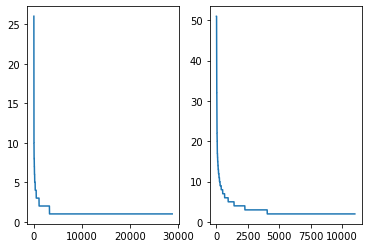

In [4]:
#phashが共通するデータの分布
plt.subplot(1,2,1)
plt.plot(train_csv.image_phash.value_counts().values)
#label_groupが共通するデータの分布
plt.subplot(1,2,2)
plt.plot(train_csv.label_group.value_counts().values)

# phashが共通する画像
phashが同じということは、画像自体が同じもの

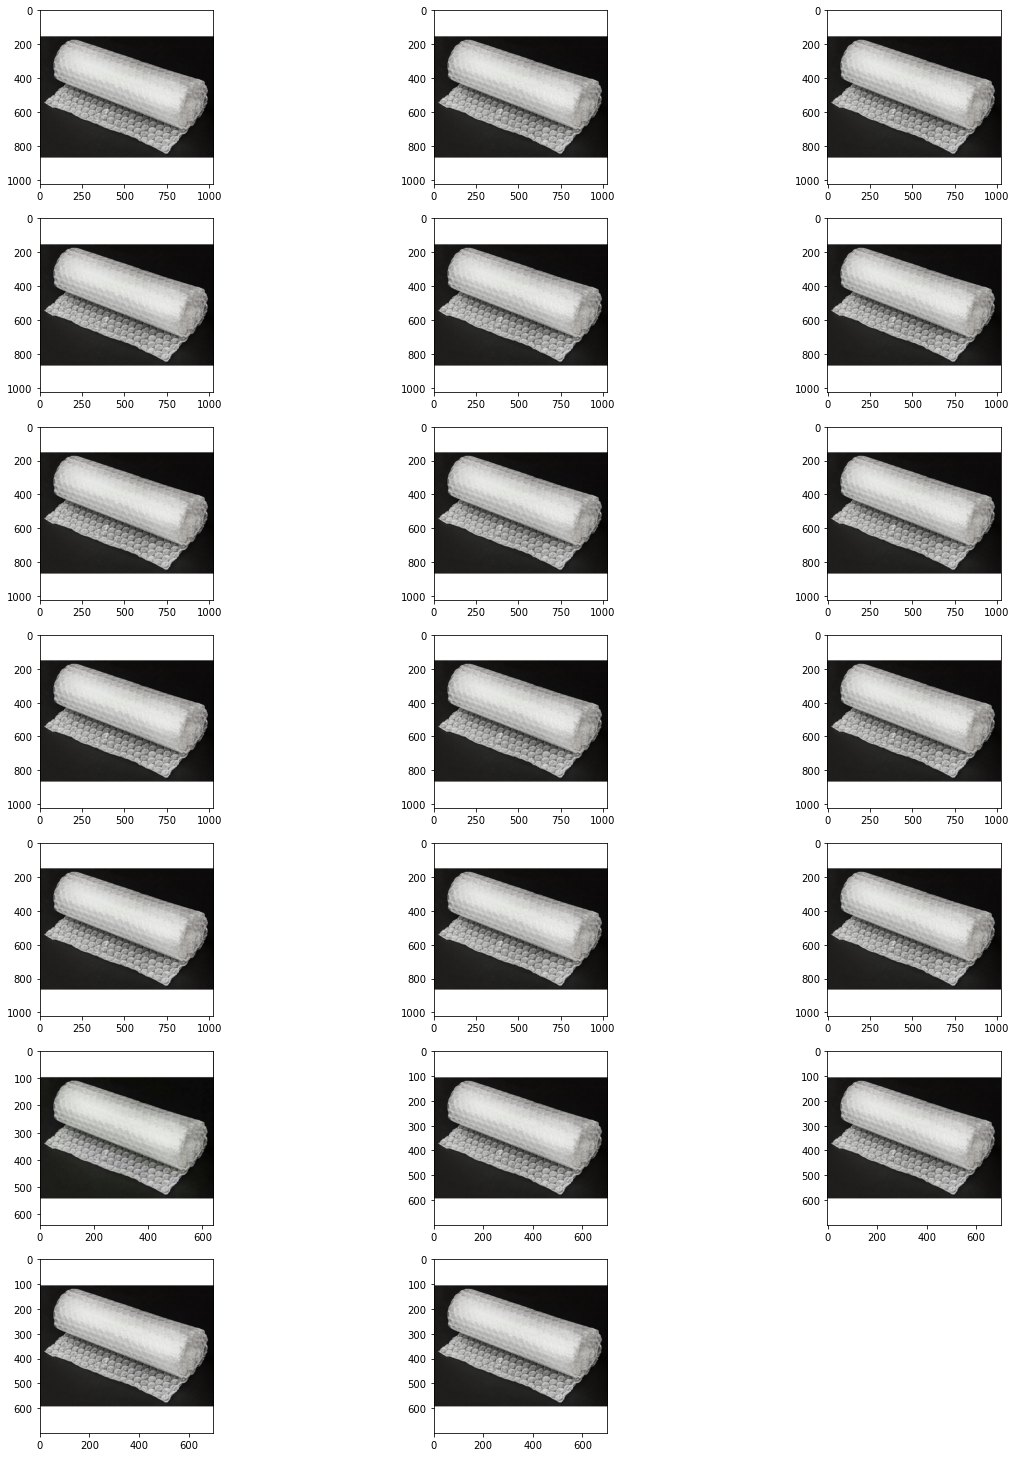

In [18]:
plt.figure(figsize = (20,30))
phash_id = "d0c0ea37bd9acce0"
train_csv_focus = train_csv[train_csv.image_phash == phash_id]
for i in range(len(train_csv_focus)):
    path_image = train_csv_focus.iloc[i].image
    image = Image.open("train_images/"+path_image)
    plt.subplot(int(len(train_csv_focus)/3)+2,3,i+1)
    plt.imshow(np.array(image))

# label_groupが共通する画像
異なる画像でも同じ商品を表している。

In [6]:
train_csv.label_group.value_counts().index[8]

1733221456

In [10]:
len(train_csv_focus)

posting_id                                 image  \
666    train_1689011486  0541772eb55db4a8ac753c20868362b7.jpg   
957    train_3416091803  0782457d2016001ef37b951c0be72dce.jpg   
2832   train_2163084053  1596638e00b40bdca7022b984520a854.jpg   
3544   train_2786201635  1b1da1430125b2f1058f5d45ad9e0074.jpg   
5812   train_2042252057  2bd0ea18582ef886a2c34304c0e1f32b.jpg   
22244  train_4075413804  a702e32679b15f6daf30d32a0cabd298.jpg   
26569   train_879950940  c6ccf647f7d26eb64274325f534b059d.jpg   

            image_phash                                              title  \
666    bff1e10fc8c41a70         Holder Tempelan Gurita Cumi 3M Warna warni   
957    fb23c4c4a6526da5  Tempelan gurita / Perekat handphone HP gojek 3...   
2832   b5f292b49ad5883a               TEMPELAN HP 3 M / TEMPELAN HANDPHONE   
3544   8c4ef1b112d6d93a  holder cumi gurita 24 tentacle tentakel tempel...   
5812   bfb1e10fc8c41a78    Tempelan HP Handphone holder gurita Tentakel 3M   
22244  b89dcf0ba79286c1        Tempelan gurita hp / tempelan gurita lem 3m   
26569  b89dcf0ba79286c1  Free Produk Holder Gurita Khusus Pembelian Leb...   

       label_group  
666     1401540089  
957     1401540089  
2832    1401540089  
3544    1401540089  
5812    1401540089  
22244   1401540089  
26569   1401540089

159351600


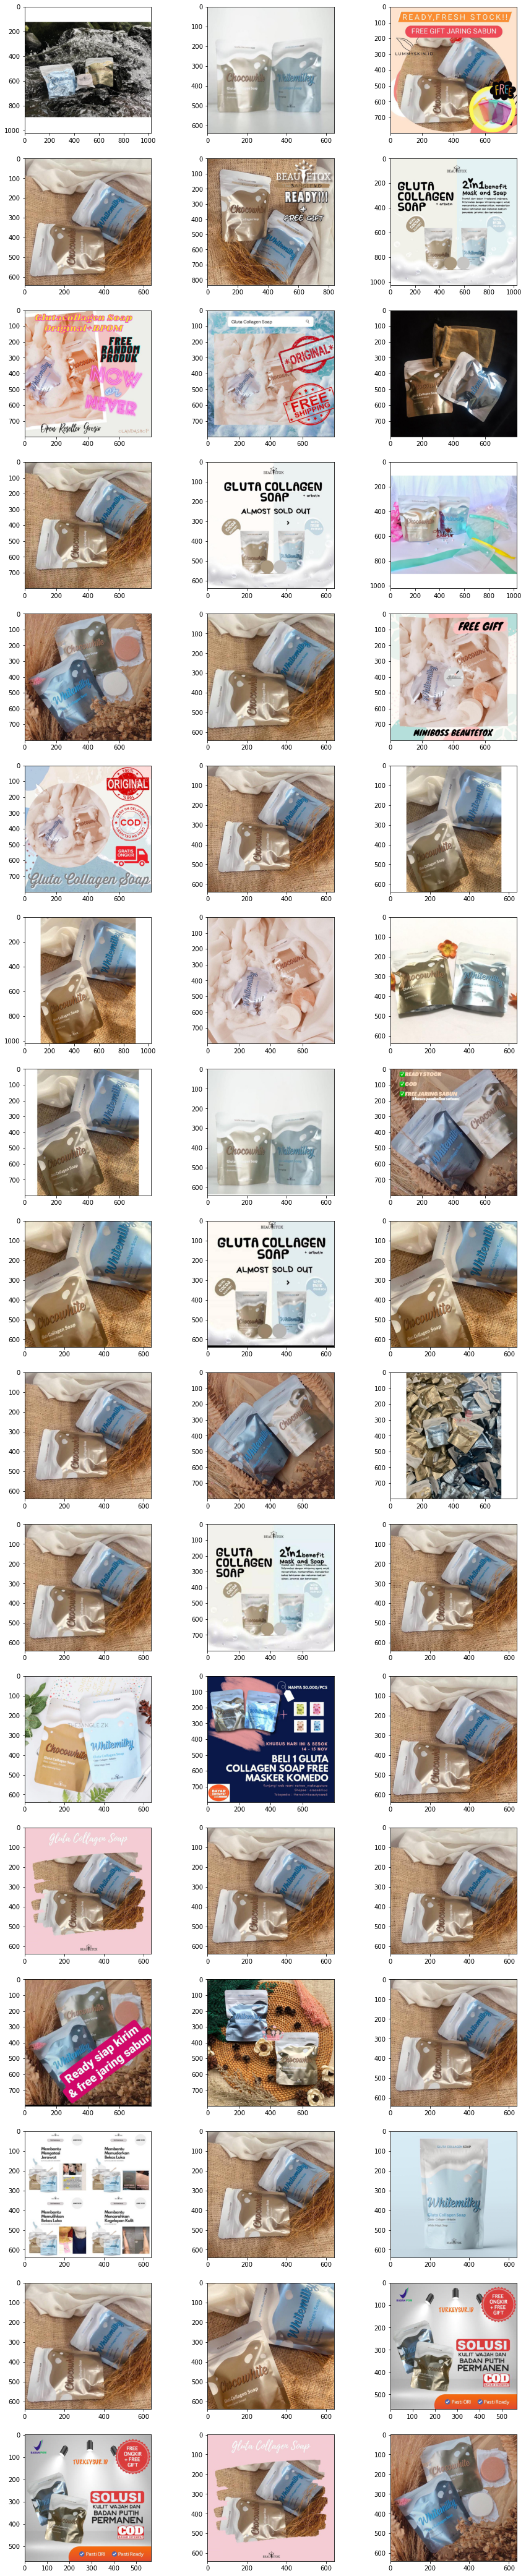

In [17]:
label_group = train_csv.label_group.value_counts().index[5]
print(label_group)
train_csv_focus = train_csv[train_csv.label_group == label_group]
plt.figure(figsize = (15,int(len(train_csv_focus)/3)*5))
for i in range(len(train_csv_focus)):
    path_image = train_csv_focus.iloc[i].image
    image = Image.open("train_images/"+path_image)
    plt.subplot(int(len(train_csv_focus)/3)+2,3,i+1)
    plt.imshow(np.array(image))

# データの確認
画像の存在しないデータなどを確認

In [8]:
#全部のデータに対して画像が存在するらしい
imagename_list = [path.name for path in  list((WORK_DIR/"train_images/").glob("*.jpg"))]
train_csv[train_csv.apply(lambda x: x.image not in imagename_list, axis=1)]

Empty DataFrame
Columns: [posting_id, image, image_phash, title, label_group]
Index: []